In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CSV files into pandas DataFrames
df  = pd.read_csv('data/merged_data.csv')

In [3]:
df.head()

id        date  store_nbr      family  sales  onpromotion store_city  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0      Quito   
1   1  2013-01-01          1   BABY CARE    0.0            0      Quito   
2   2  2013-01-01          1      BEAUTY    0.0            0      Quito   
3   3  2013-01-01          1   BEVERAGES    0.0            0      Quito   
4   4  2013-01-01          1       BOOKS    0.0            0      Quito   

  store_state store_type  store_cluster holidays_type holidays_locale  \
0   Pichincha          D             13       Holiday        National   
1   Pichincha          D             13       Holiday        National   
2   Pichincha          D             13       Holiday        National   
3   Pichincha          D             13       Holiday        National   
4   Pichincha          D             13       Holiday        National   

  holidays_locale_name holidays_description holidays_transferred  oil_price  
0              Ecuador   Primer dia del ano                False      93.14  
1              Ecuador   Primer dia del ano                False      93.14  
2              Ecuador   Primer dia del ano                False      93.14  
3              Ecuador   Primer dia del ano                False      93.14  
4              Ecuador   Primer dia del ano                False      93.14

# Sales by Product Family

Lets look at the sales percentage by store and family of product.

In [4]:
unique_values = df['family'].unique()
print("Unique values in 'Category' column:", unique_values)

Unique values in 'Category' column: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


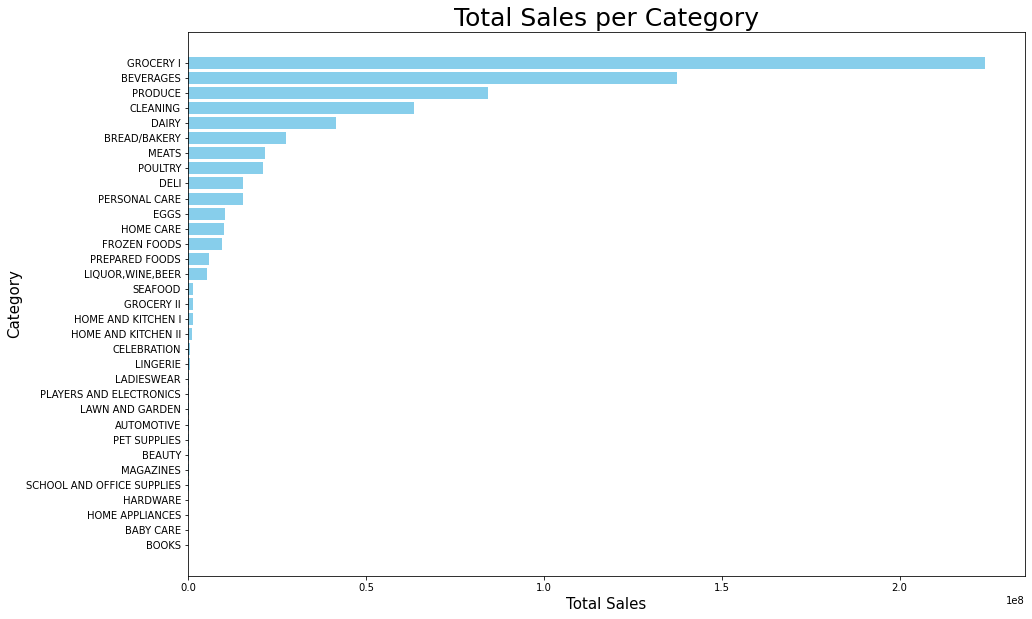

In [5]:
category_sales = df.groupby('family')['sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='sales', ascending=True)
# print(category_sales)

# Create a bar chart
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plt.barh(category_sales['family'], category_sales['sales'], color='skyblue')

plt.title('Total Sales per Category', fontsize=25)
plt.xlabel('Total Sales',fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.xticks(fontsize=10)

# Show the plot
plt.show()

We can see that three category have maximum sales: grocery, beverages, produce and cleaning have maximum sales. And the categories like books, home appliances, magazines have almost negligible sales

# Sales by Store


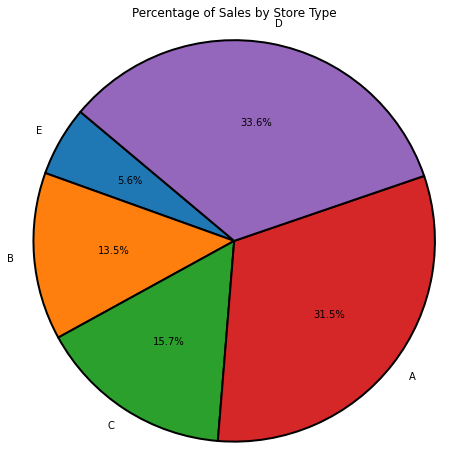

In [6]:
store_sales = df.groupby('store_type')['sales'].sum().reset_index()
store_sales = store_sales.sort_values(by='sales')
# print(store_sales)
total_sales = df['sales'].sum()

# Calculate the percentage of sales for each store type
store_sales['percentage_sales'] = (store_sales['sales'] / total_sales) * 100

# Sort the DataFrame by percentage sales
store_sales = store_sales.sort_values(by='percentage_sales', ascending=True)


plt.figure(figsize=(8, 8))
plt.pie(store_sales['percentage_sales'], labels=store_sales['store_type'], autopct='%1.1f%%', startangle=140, 
    wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
plt.title('Percentage of Sales by Store Type')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

We can see that Store type D has the maximum sales. But this can be due to more number of store of type D. So, in order to analyze wether storr type D has more sales compared to other type, lets visualize the average sales by sales type. For this we will calculate total sales for each store type and divide it by the total number of stores in each type. For eg, if store type D has total sales of amount 1000 and total number of store under D category is 10 then average sales for category D will be 1000/10=100.

# Average sales by store type

  store_type   total_sales  store_count  avg_sale_in_million
0          E  3.943943e+07            4             9.859857
1          B  9.457896e+07            8            11.822370
2          C  1.101543e+08           15             7.343620
3          A  2.212315e+08            9            24.581283
4          D  2.359601e+08           18            13.108896


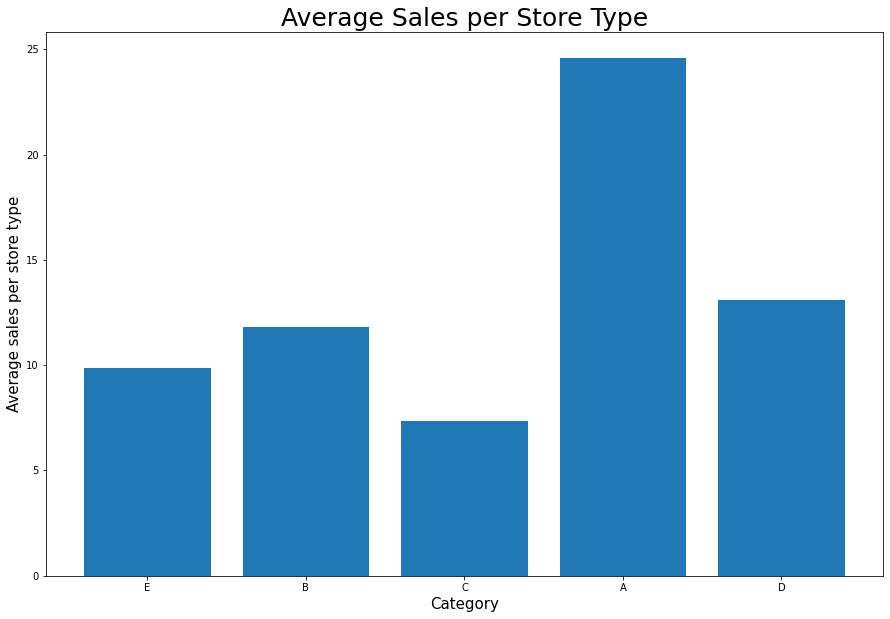

In [7]:
store_sales = df.groupby('store_type')['sales'].sum().reset_index()
store_sales = store_sales.sort_values(by='sales')


# Calculate the number of unique store numbers per store type
store_count = df.groupby('store_type')['store_nbr'].nunique().reset_index()

# Merge the two DataFrames on 'store_type'
store_sales = store_sales.merge(store_count, on='store_type', suffixes=('_sales', '_count'))

# Rename the columns for clarity
store_sales = store_sales.rename(columns={'sales': 'total_sales', 'store_nbr': 'store_count'})

store_sales['avg_sale_in_million'] = (store_sales['total_sales']/store_sales['store_count'])/1000000
print(store_sales)

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plt.bar(store_sales['store_type'], store_sales['avg_sale_in_million'])
plt.title('Average Sales per Store Type', fontsize=25)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Average sales per store type', fontsize=15)
plt.xticks(fontsize=10)

# Show the plot
plt.show()

From the bar plot, we can see that on average store from store category A makes more sale than the other store type.

# Sales pattern by month

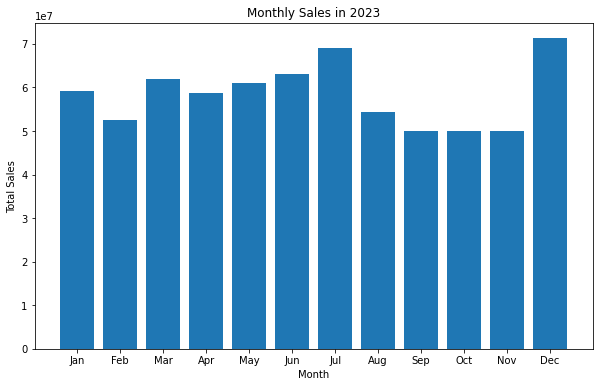

In [8]:
df['date'] = pd.to_datetime(df['date'])
# Extract the month from the date
df['Month'] = df['date'].dt.month

# Group the data by month and sum the sales
monthly_sales = df.groupby('Month')['sales'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['sales'])

# Customize the plot
plt.title('Monthly Sales in 2023')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Set the x-axis ticks to represent months
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_sales['Month'], month_names)

# Show the plot
plt.show()

# Understand the nature of Promotion

## which family of product is most frequently on promotion?

In [9]:
# Group by 'family' and count the number of True values in 'onpromotion'
family_onpromotion_counts = df.groupby('family')['onpromotion'].sum().reset_index()
family_onpromotion_counts = family_onpromotion_counts.sort_values(by='onpromotion', ascending=False)


# Rename the column for clarity
family_onpromotion_counts = family_onpromotion_counts.rename(columns={'onpromotion': 'sum_product_onpromotion'})
family_onpromotion_counts

family  sum_product_onpromotion
12                   GROCERY I                  1384249
30                     PRODUCE                  1086172
3                    BEVERAGES                   651808
8                        DAIRY                   600152
9                         DELI                   539600
7                     CLEANING                   474687
24                       MEATS                   293988
28                     POULTRY                   223529
10                        EGGS                   187712
25               PERSONAL CARE                   175276
18                   HOME CARE                   140638
5                 BREAD/BAKERY                   135349
11                FROZEN FOODS                    58837
29              PREPARED FOODS                    34384
15          HOME AND KITCHEN I                    32737
22            LIQUOR,WINE,BEER                    31828
32                     SEAFOOD                    31205
16         HOME AND KITCHEN II                    23277
20             LAWN AND GARDEN                    11158
31  SCHOOL AND OFFICE SUPPLIES                     9914
2                       BEAUTY                     9260
6                  CELEBRATION                     4713
0                   AUTOMOTIVE                     3246
26                PET SUPPLIES                     2276
21                    LINGERIE                     1825
13                  GROCERY II                     1591
27     PLAYERS AND ELECTRONICS                      931
19                  LADIESWEAR                      882
23                   MAGAZINES                      152
14                    HARDWARE                      109
17             HOME APPLIANCES                       36
1                    BABY CARE                       29
4                        BOOKS                        0

We can see that the product having higher sales are promoted frequently, which gives us a hint that promotion might increase the sales

## Does promotion have any effect on the sales? 

In [10]:
df.head()

id       date  store_nbr      family  sales  onpromotion store_city  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0      Quito   
1   1 2013-01-01          1   BABY CARE    0.0            0      Quito   
2   2 2013-01-01          1      BEAUTY    0.0            0      Quito   
3   3 2013-01-01          1   BEVERAGES    0.0            0      Quito   
4   4 2013-01-01          1       BOOKS    0.0            0      Quito   

  store_state store_type  store_cluster holidays_type holidays_locale  \
0   Pichincha          D             13       Holiday        National   
1   Pichincha          D             13       Holiday        National   
2   Pichincha          D             13       Holiday        National   
3   Pichincha          D             13       Holiday        National   
4   Pichincha          D             13       Holiday        National   

  holidays_locale_name holidays_description holidays_transferred  oil_price  \
0              Ecuador   Primer dia del ano                False      93.14   
1              Ecuador   Primer dia del ano                False      93.14   
2              Ecuador   Primer dia del ano                False      93.14   
3              Ecuador   Primer dia del ano                False      93.14   
4              Ecuador   Primer dia del ano                False      93.14   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1

In [11]:
df['Month-Year']= df['date'].dt.to_period('M') #M for month
df['Promo'] = df['onpromotion'] != 0
df['Promo'] = df['Promo'].map({True : 'Promo', False : 'No Promo'})

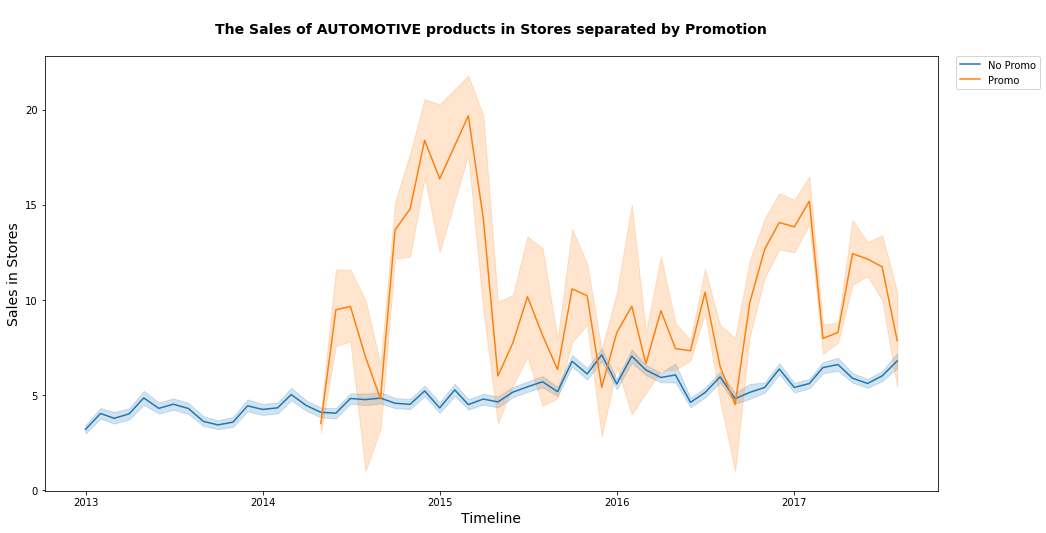

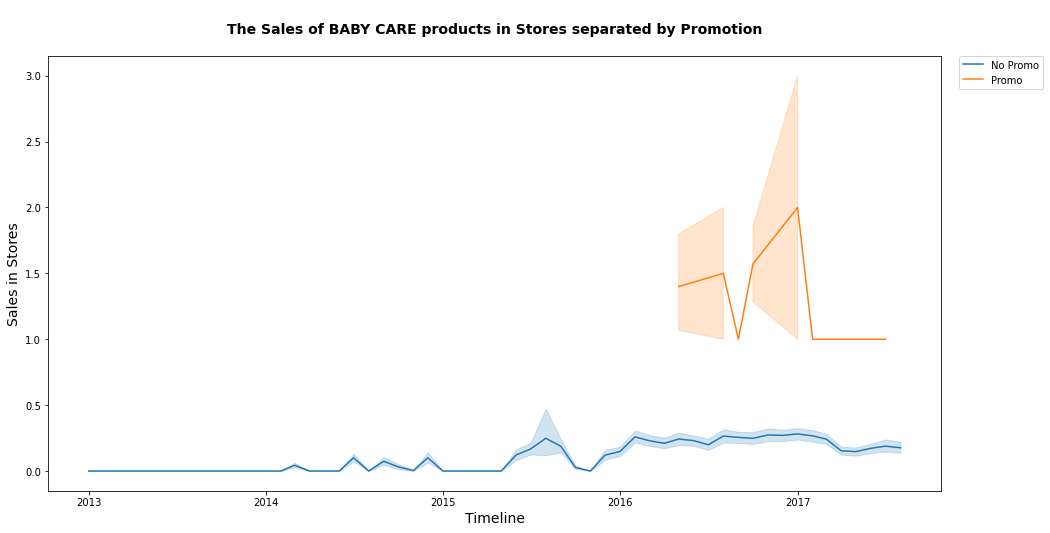

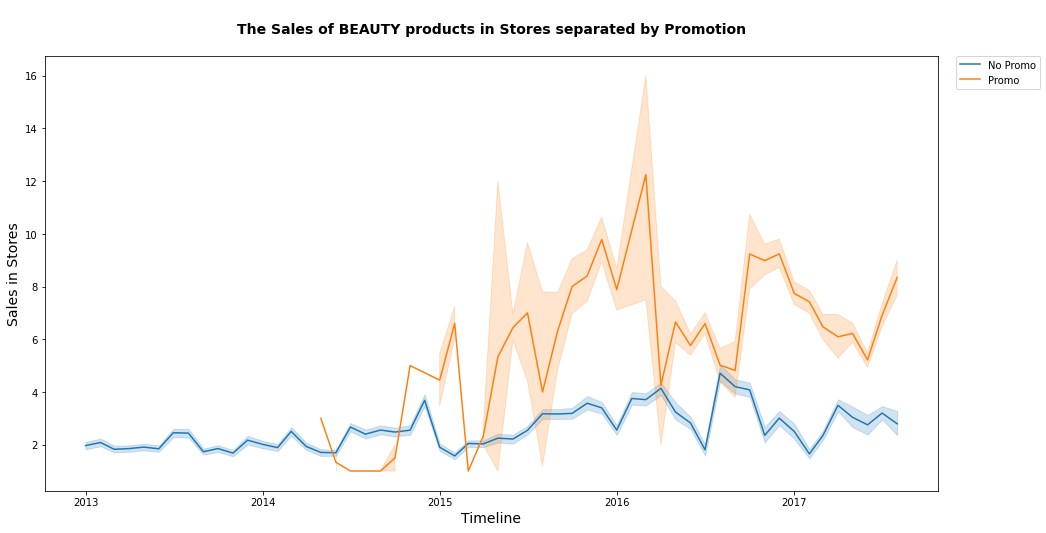

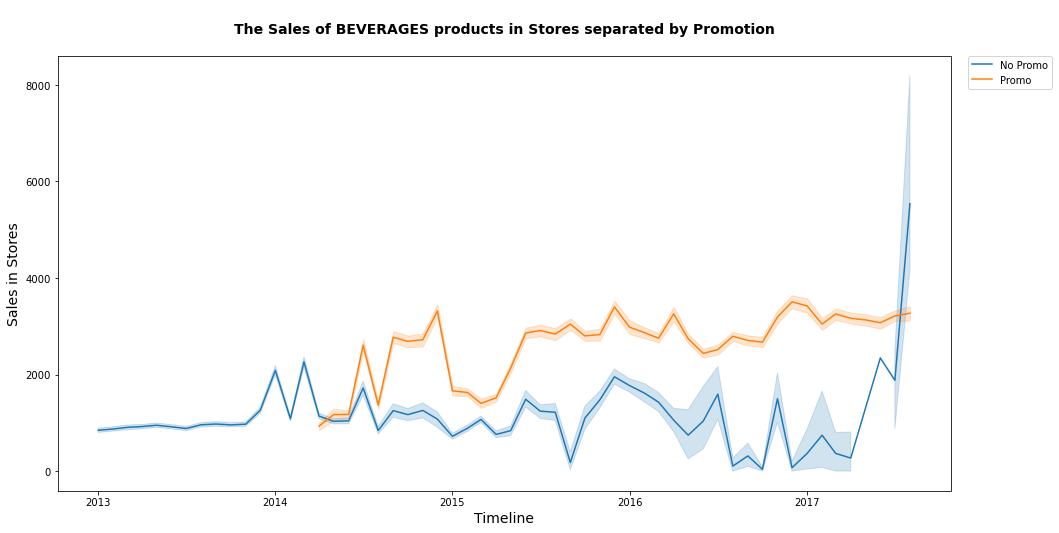

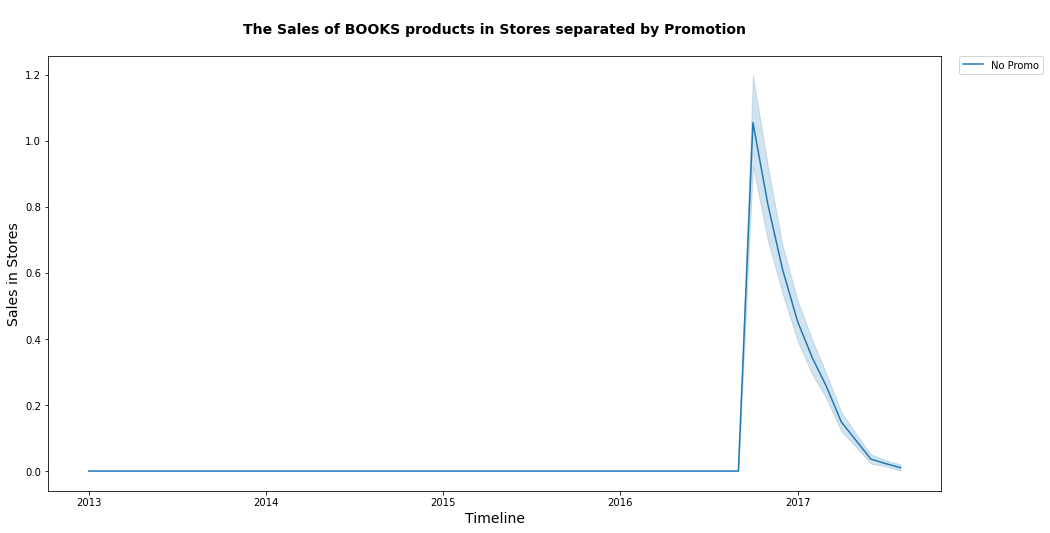

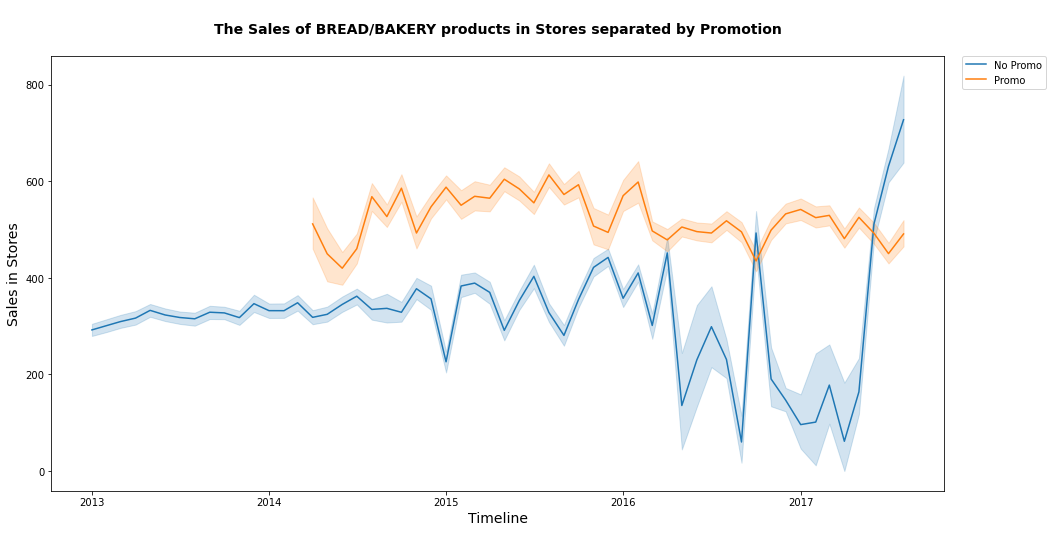

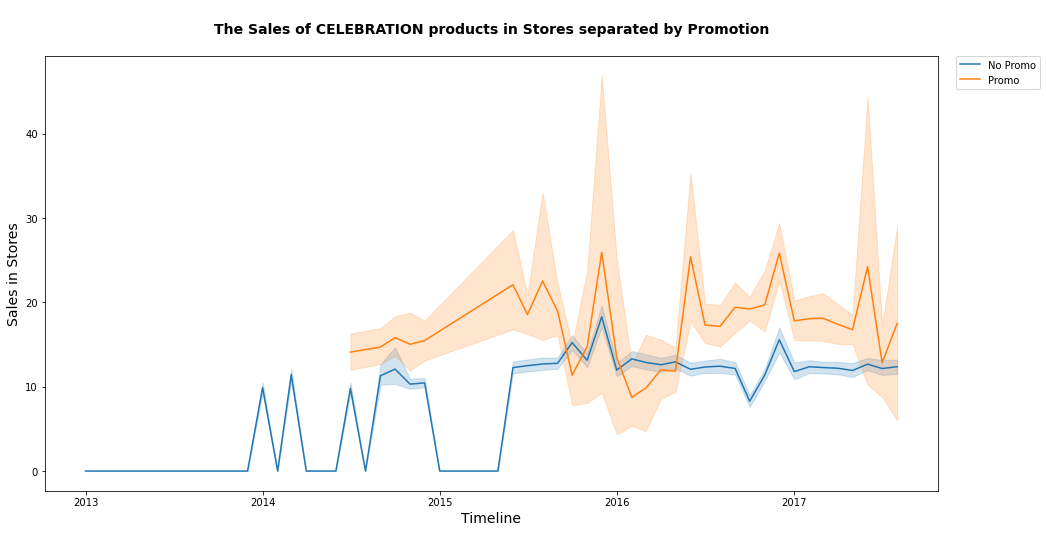

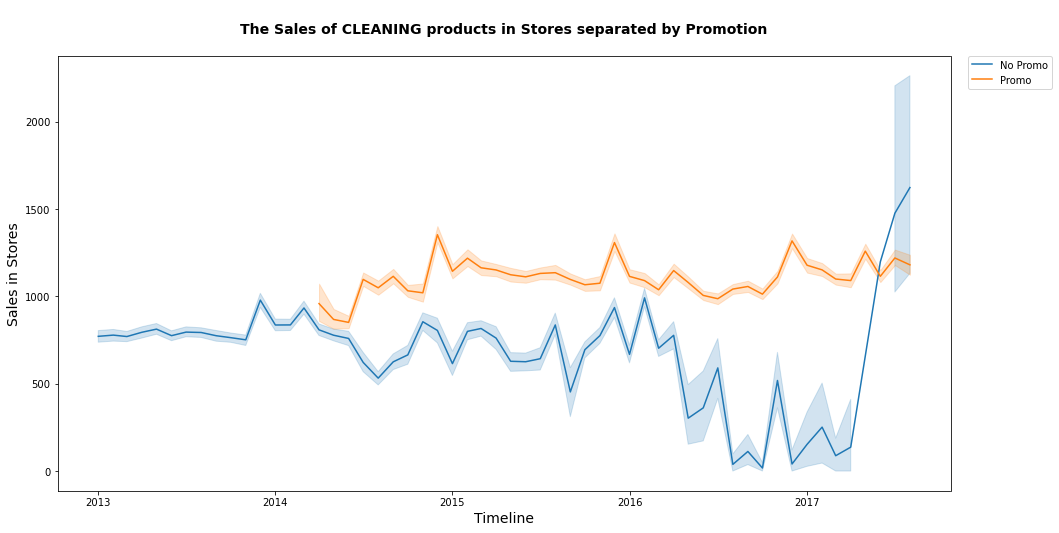

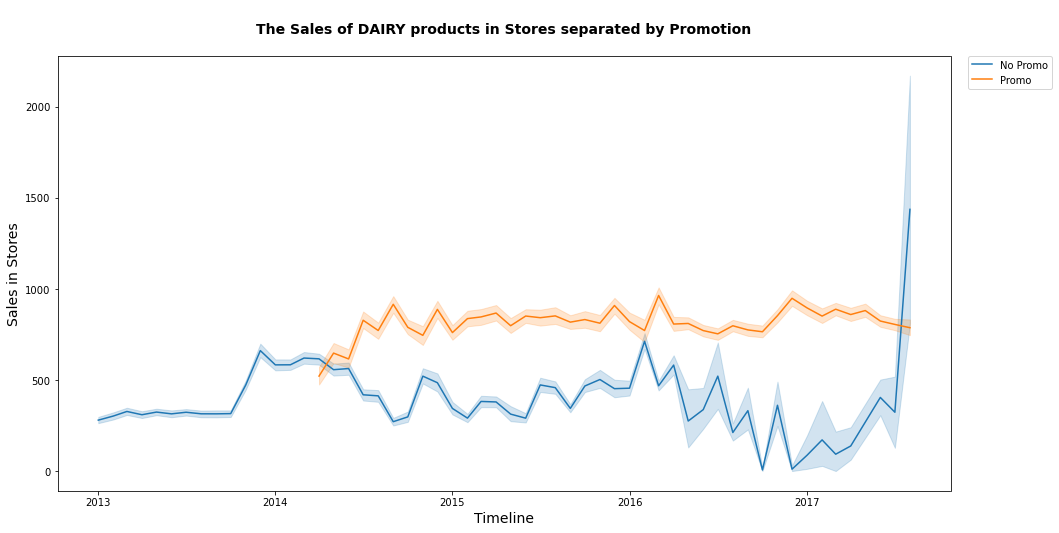

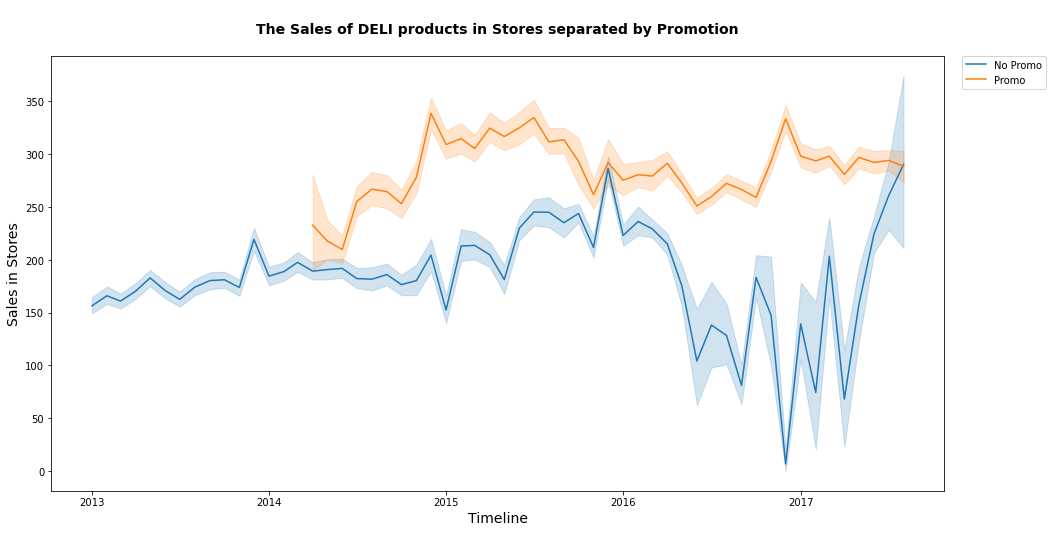

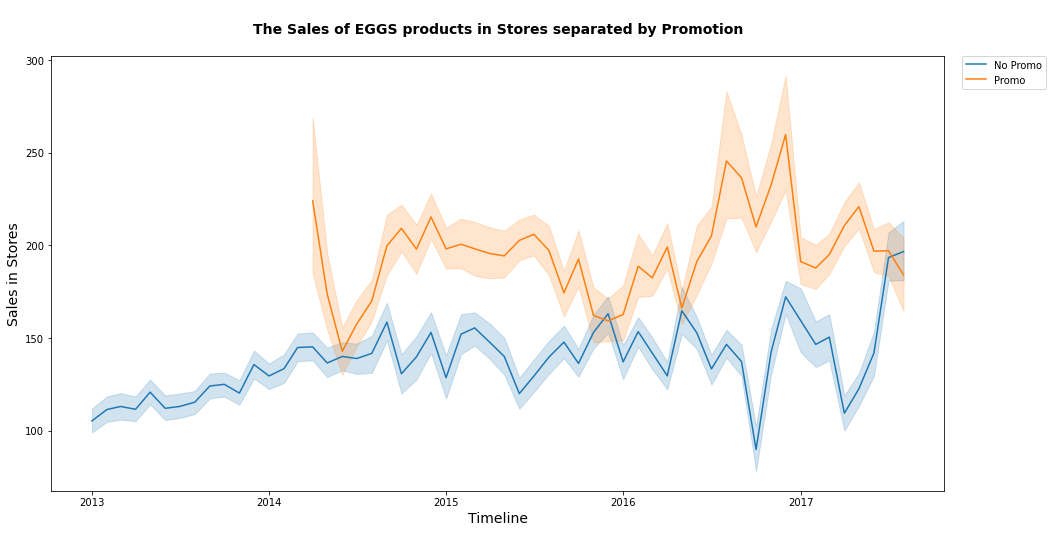

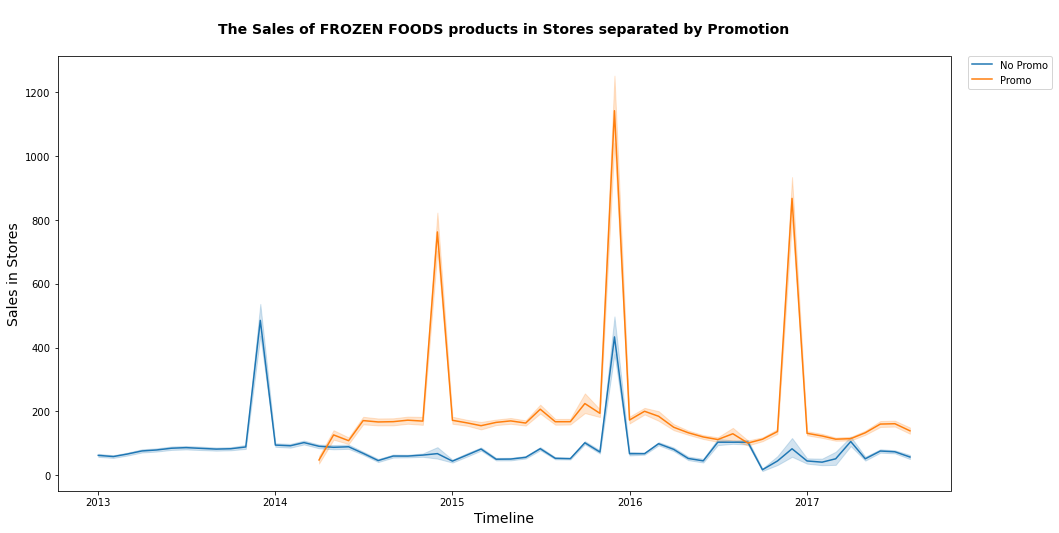

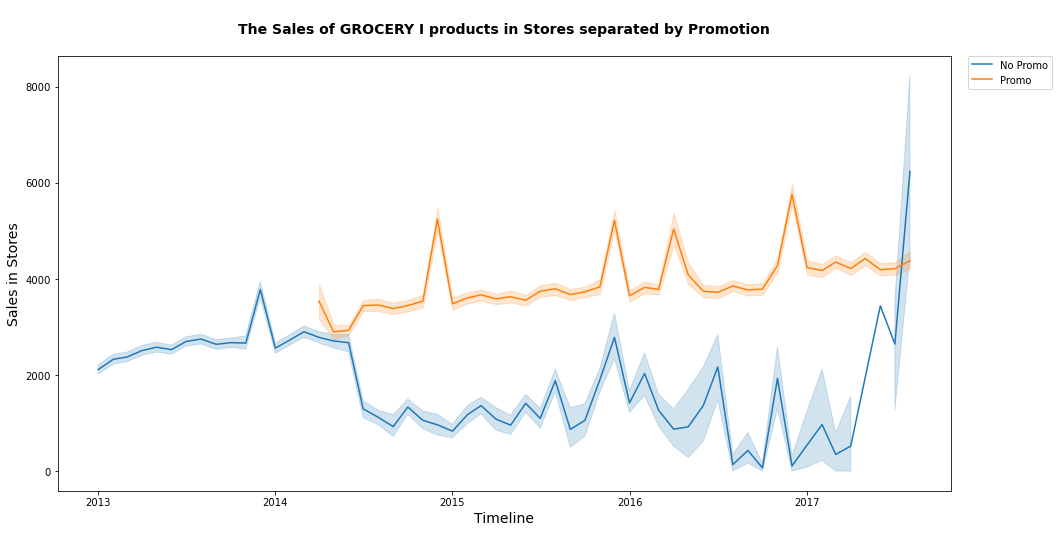

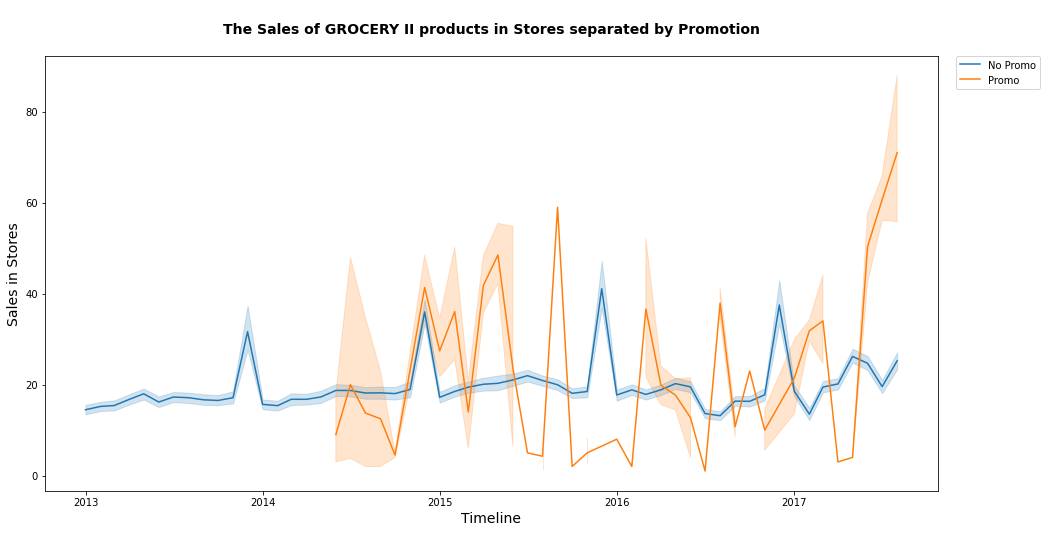

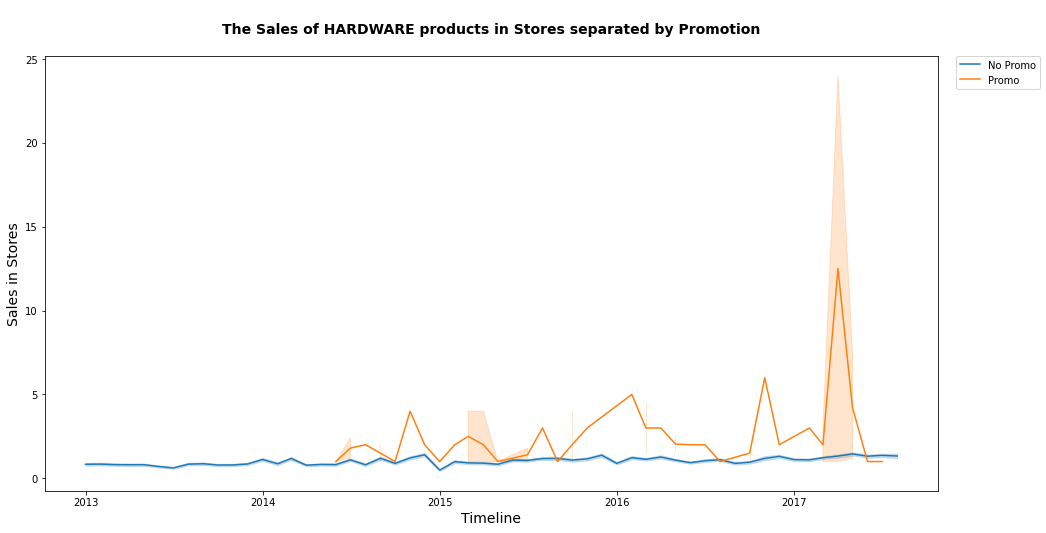

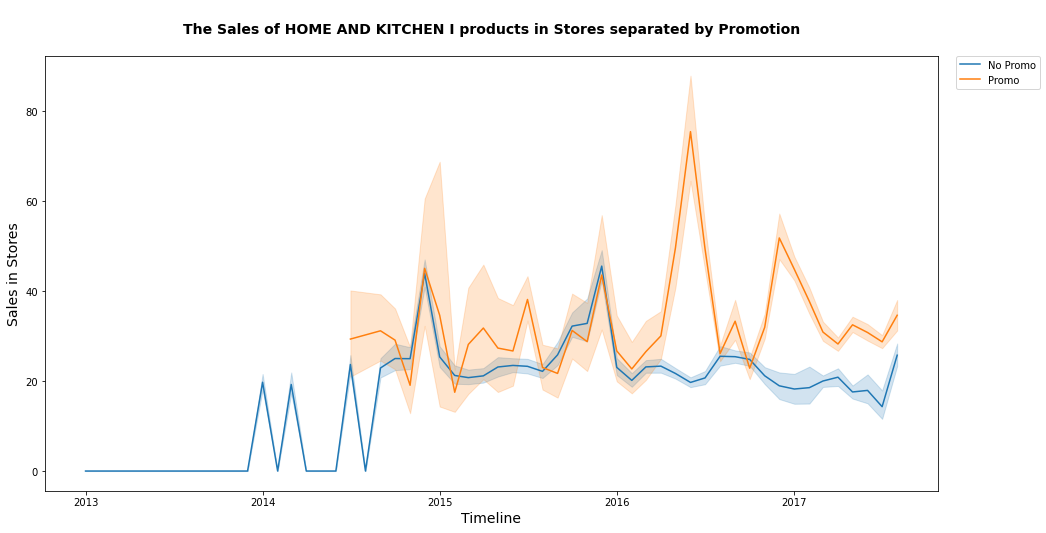

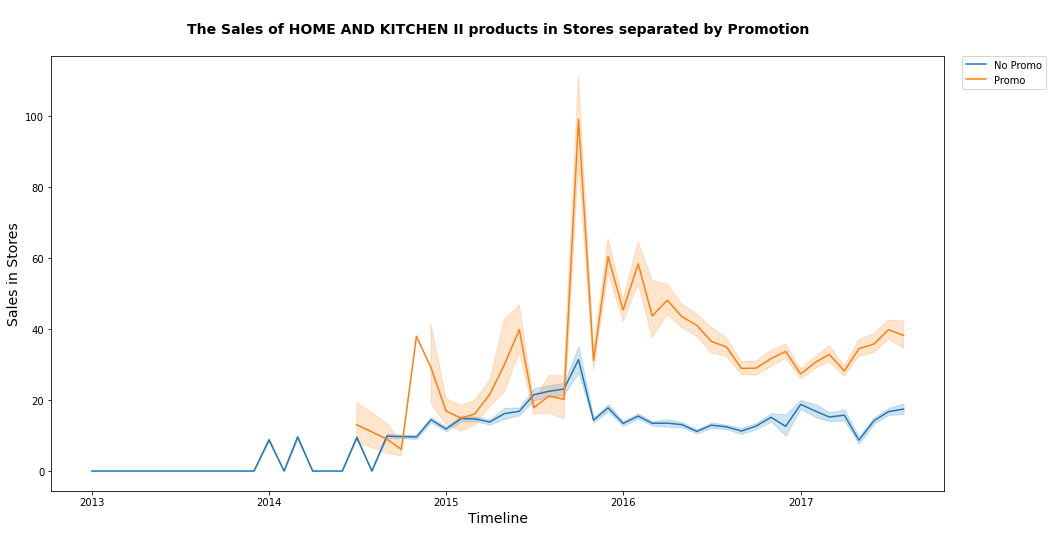

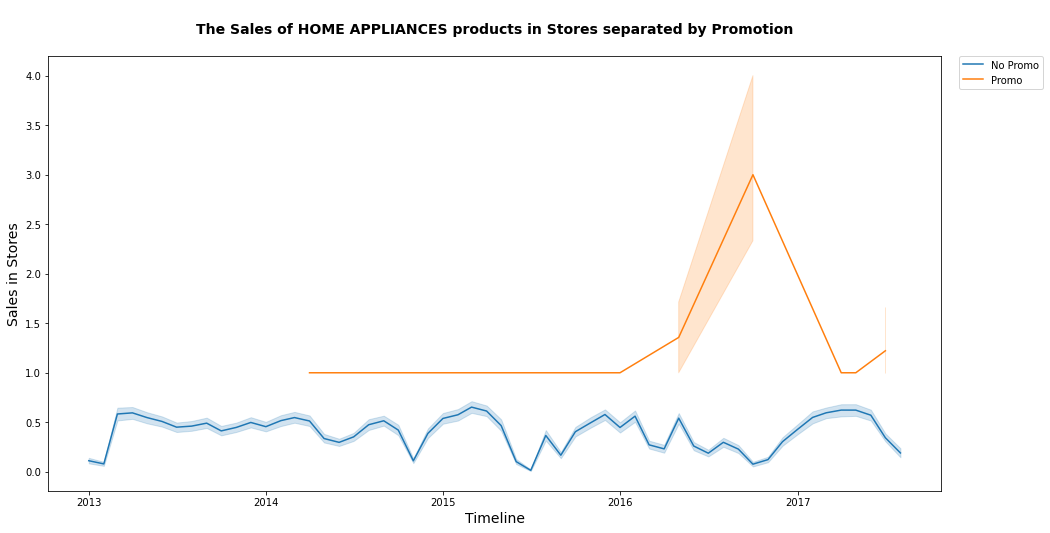

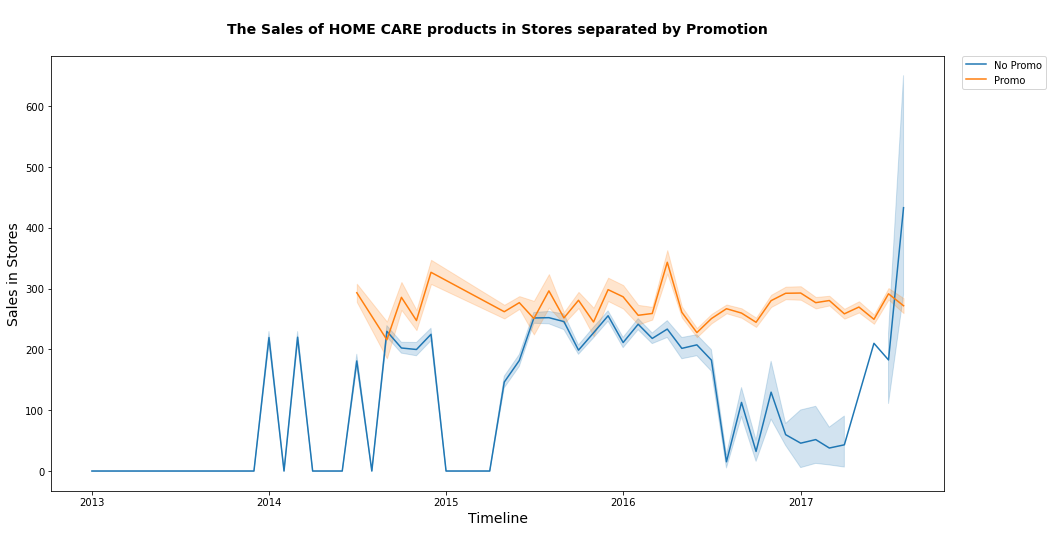

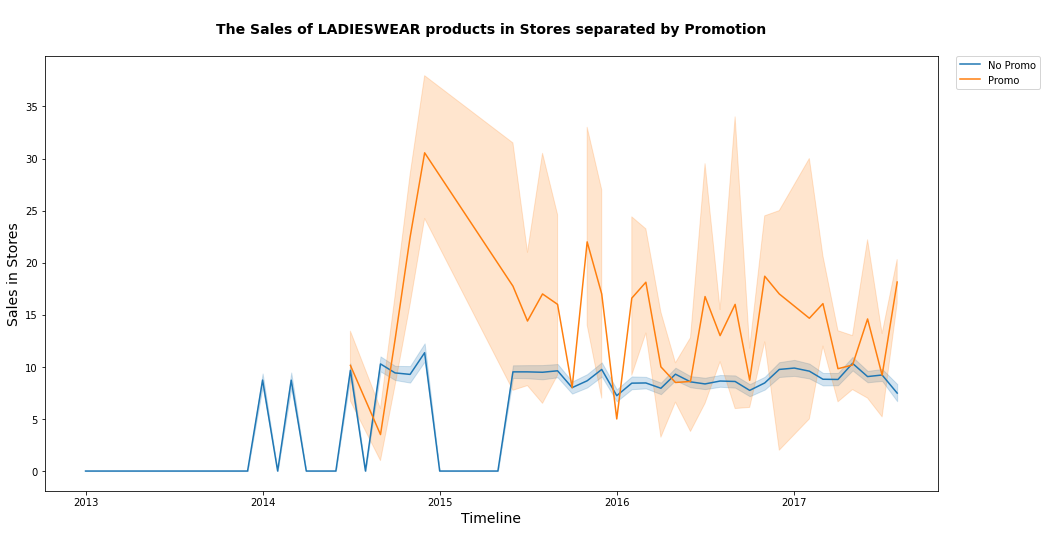

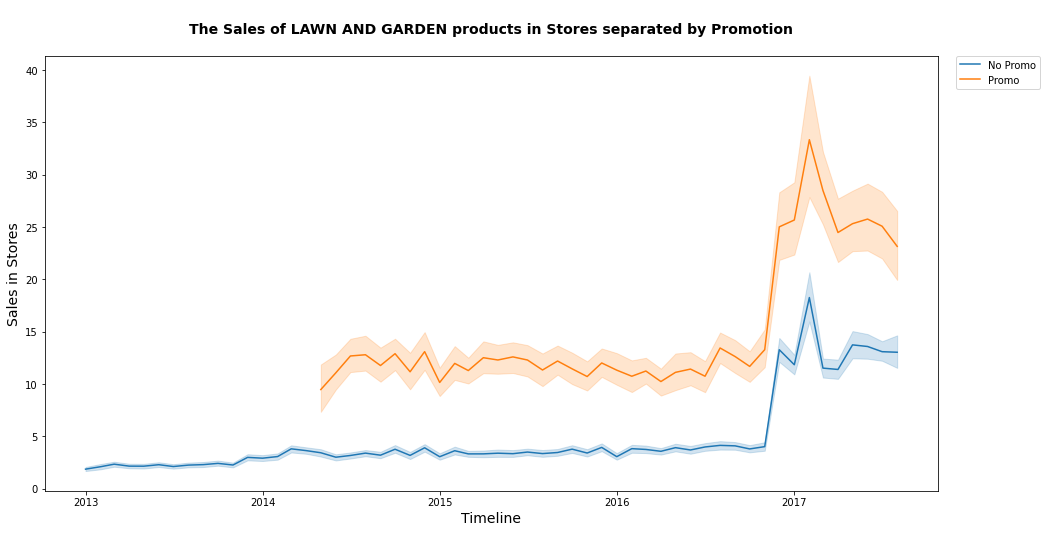

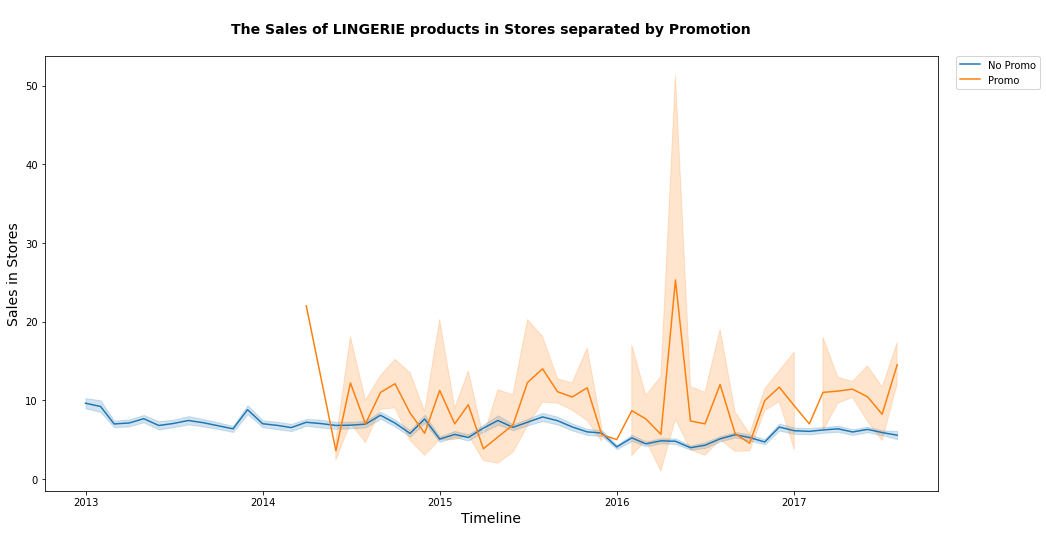

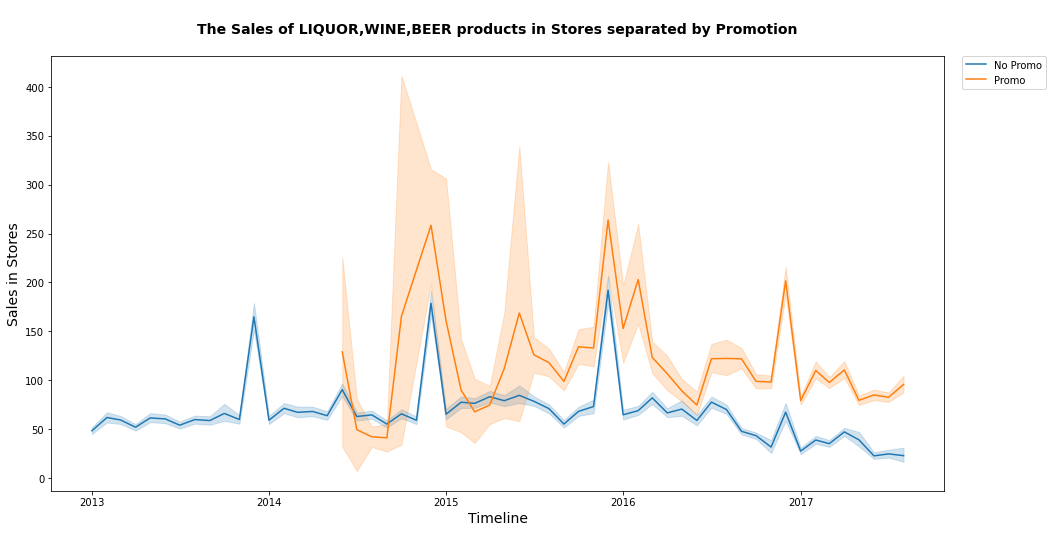

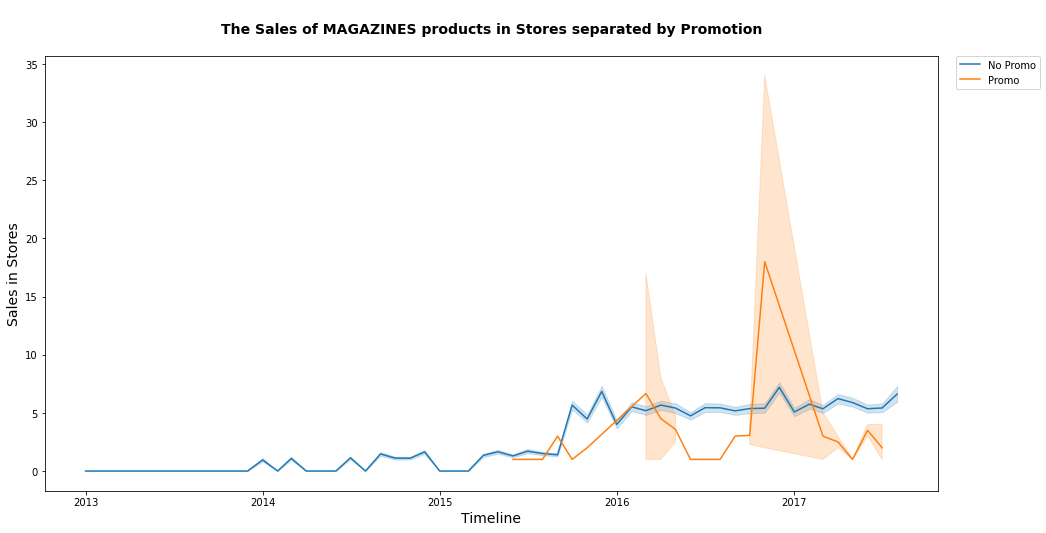

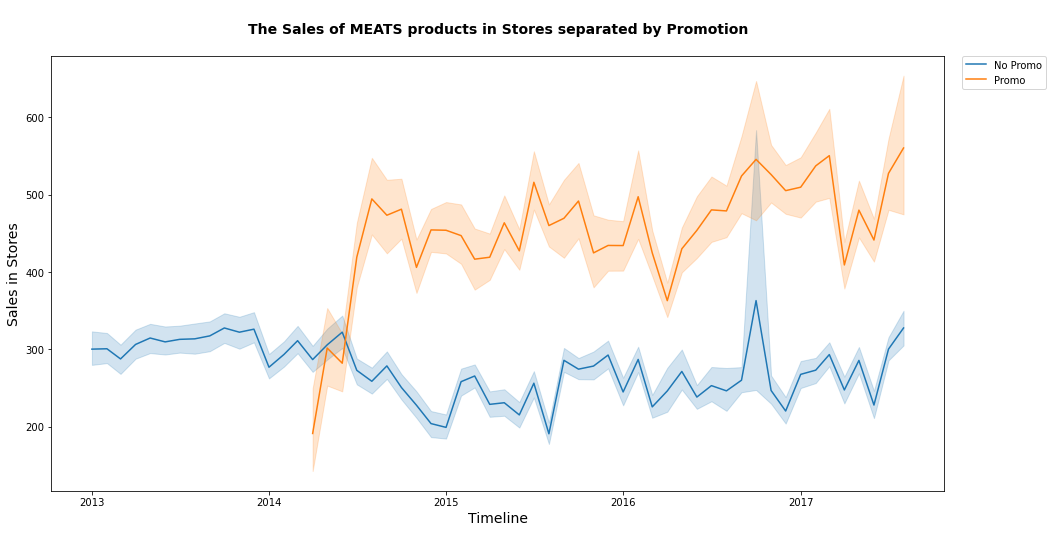

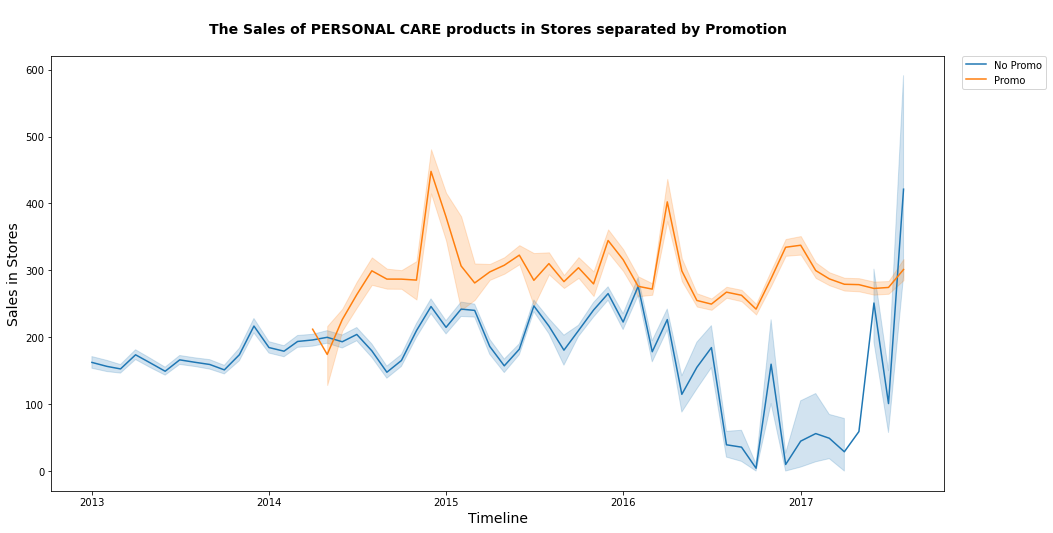

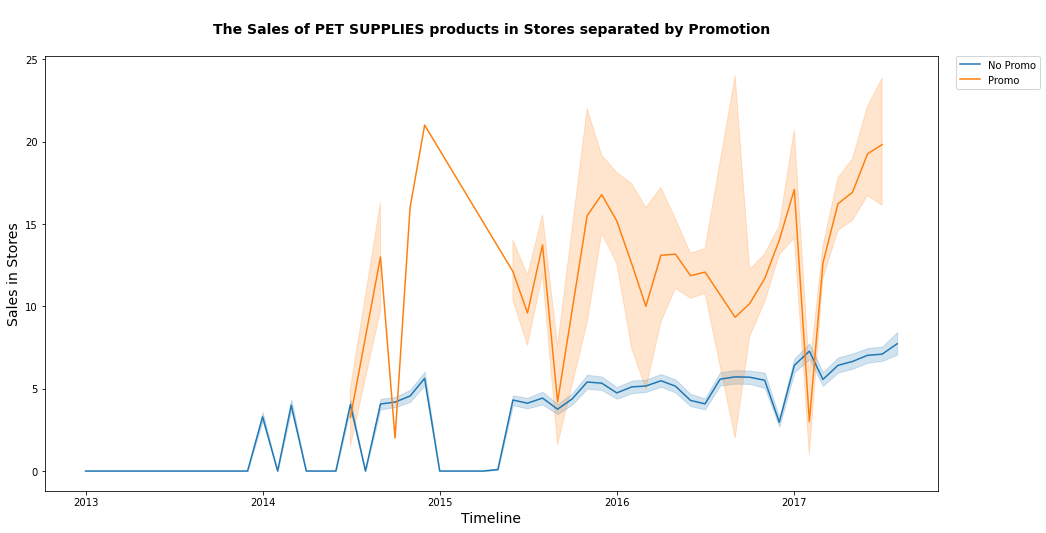

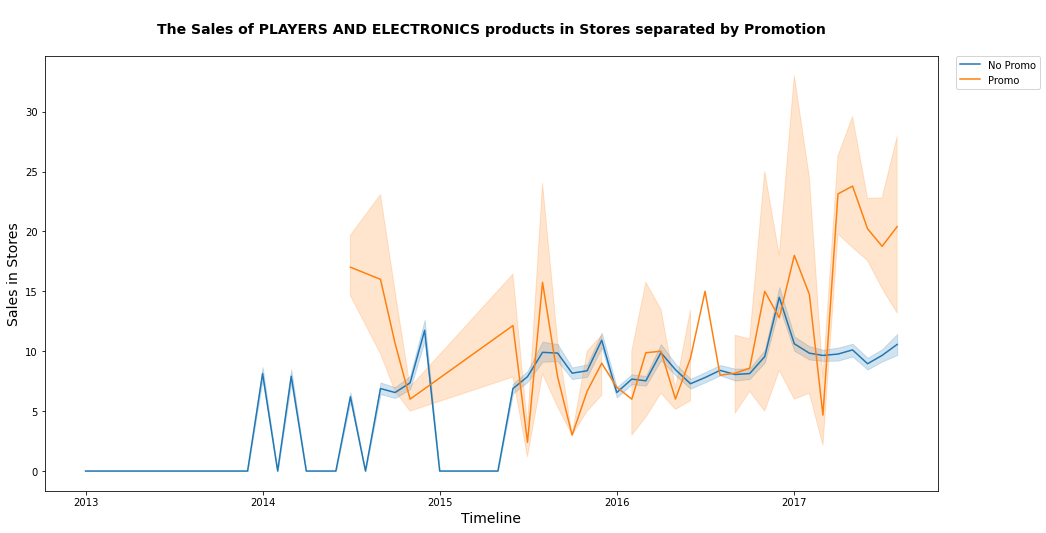

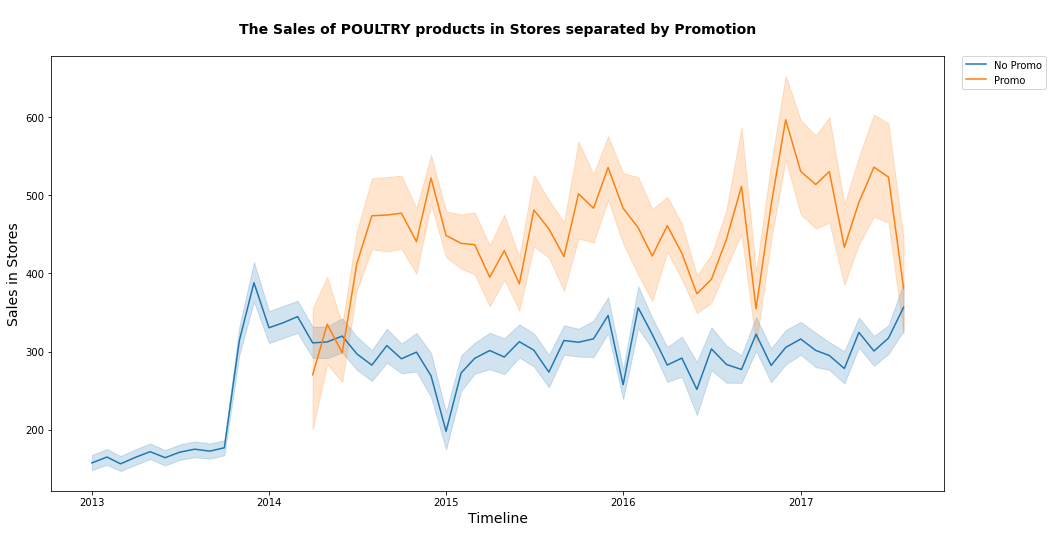

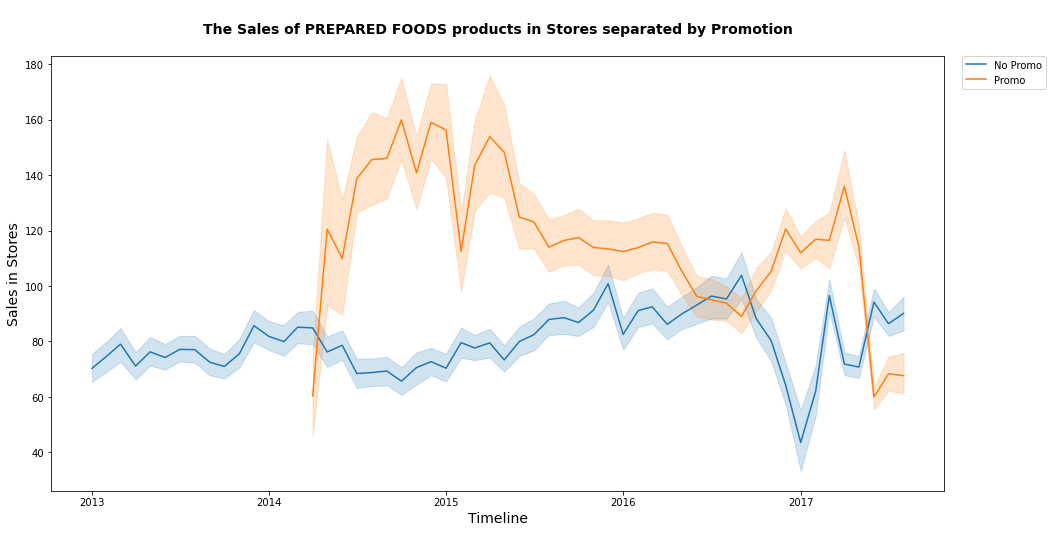

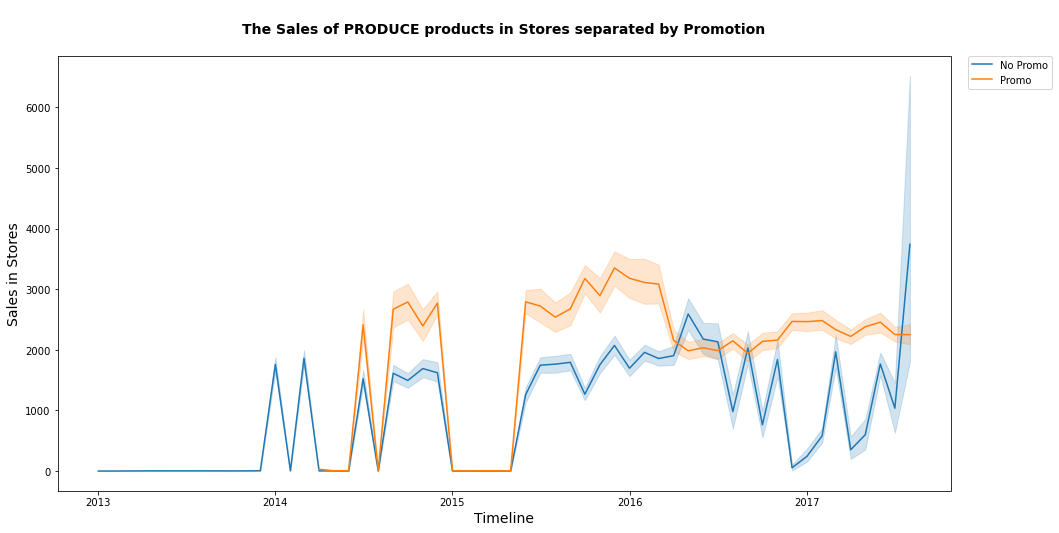

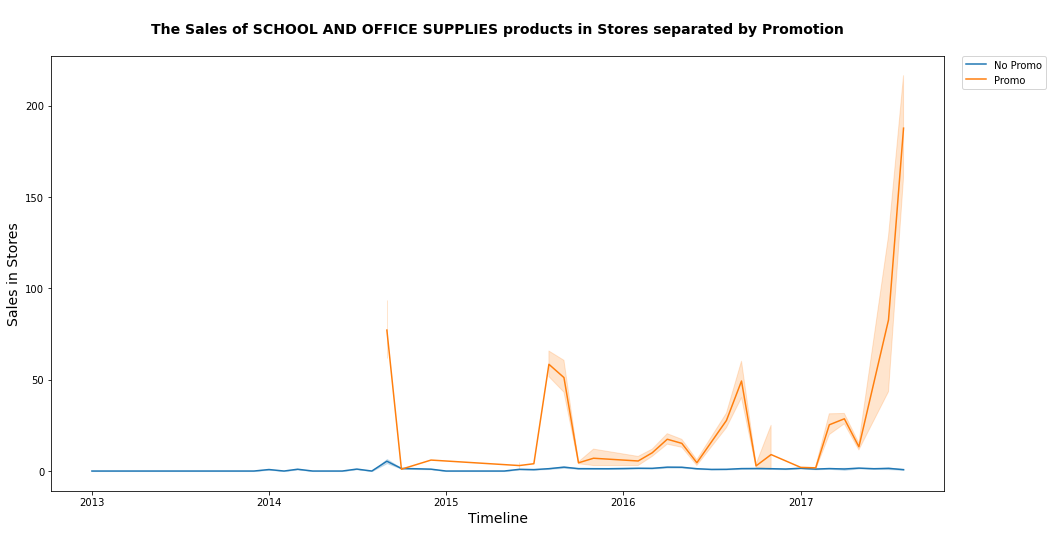

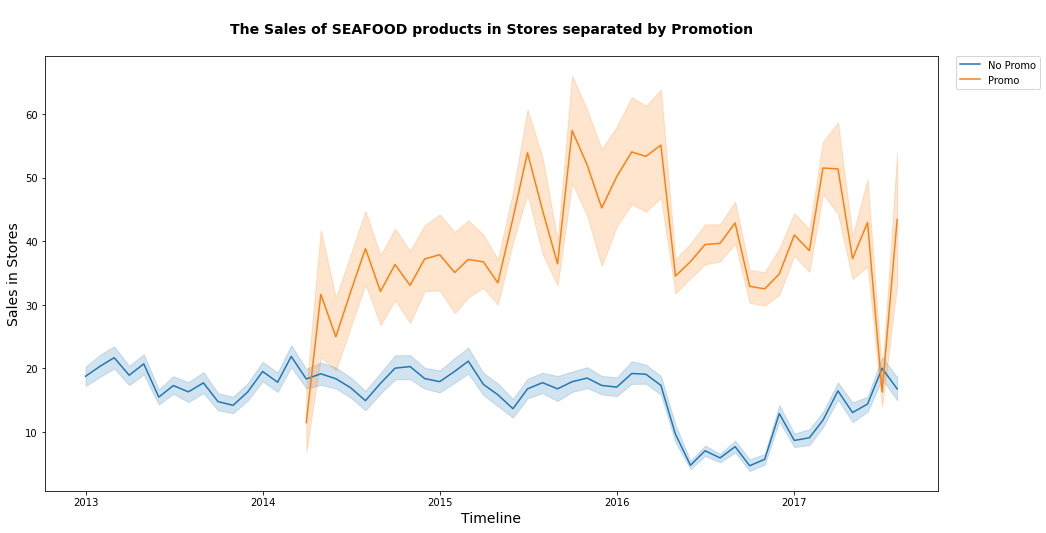

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

families = df.family.unique()

for fam in families:

    # Create a figure and an axes object
    plt.figure(figsize=(16,8))
    
    # Create a temporary dataframe for each family
    new_df_p = df.loc[df.family==fam]
    
     # Convert Month-Year to timestamp to use in SNS
    new_df_p['Month-Year']=new_df_p['Month-Year'].apply(lambda x: x.to_timestamp())
    
    # Create a lineplot by Month-Year and Sales with hue as Promo flag
    sns.lineplot(x='Month-Year',y='sales',data=new_df_p, hue='Promo')
    
    # Position the legends
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    # Create the title for the plot
    plt.title('\nThe Sales of {} products in Stores separated by Promotion\n'.format(fam), weight='bold', fontsize=14)
    
    # Create the X Label and Y Label for the plot
    plt.xlabel('Timeline',fontsize=14)
    plt.ylabel('Sales in Stores', fontsize=14)
    
    # Draw the plot
    plt.show()

# plt.show()

We can see that the sales during promotion is higher than the sales during no promotion and the observation is valid for all family category

# Salary Payday effect on sales

We have a information that the salary is paid biweekly, and groceries product are the most frequently bought item. Let us visualize if the pay day have any effect on the sales amount.

## Does payday effect sales?

Usually people do shopping on the payday or next day of the pay day. Let us visualize wether sales is increase during payday compared to other day. For this we will categorize each day as payday or non-payday and calculate the sales perday for each of those category

  payday_label          sales
0   Non-payday  576278.826871
1       Payday  627228.036567


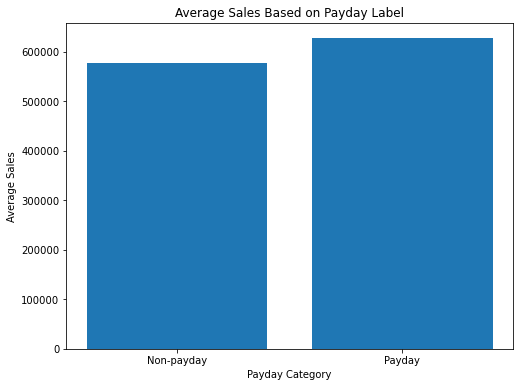

In [13]:
# Define a function to label each day as "Payday" or "Non-Payday"
def label_payday(date):
    day = date.day
    if day in [1, 15]:
        return 'Payday'
    elif day in [2, 16]:
        return 'Payday'
    else:
        return 'Non-payday'

# Apply the label_payday function to create a new column "payday_label"
df['payday_label'] = df['date'].apply(label_payday)

# we have to be carefull while calculating the  average because there are multiple rows for a single day and while 
#calculating the average the sales for each date should be added 


# Group the data by "payday_label" and calculate the average sales
average_sales_per_day = df.groupby(['date','payday_label'])['sales'].sum().reset_index()

average_sales_by_payday = average_sales_per_day.groupby('payday_label')['sales'].mean().reset_index()
print(average_sales_by_payday)
# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(average_sales_by_payday['payday_label'], average_sales_by_payday['sales'])
plt.xlabel('Payday Category')
plt.ylabel('Average Sales')
plt.title('Average Sales Based on Payday Label')
plt.show()

We can see that payday has more sales on average compared to the non-payday. People tend to shop more during their payday.

# Top 10 State by sales

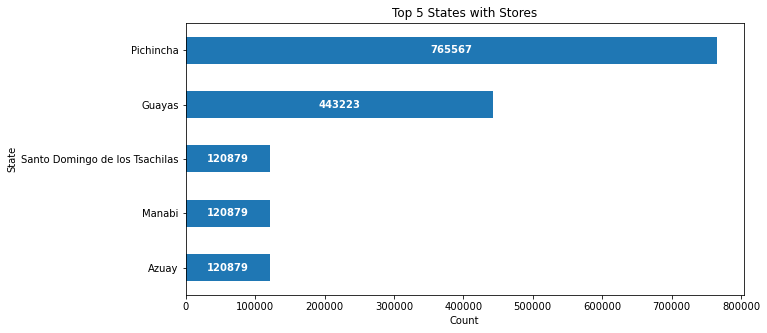

In [14]:
# Let's group the data by State and Type. Then plot the data for the Top 5 stores

grouped = df.groupby('store_state')['store_type'].count().sort_values(ascending=True).tail(5)

ax = grouped.plot(kind='barh', rot=0, figsize=(10,5), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white', weight='bold')

plt.title('Top 5 States with Stores')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

# Sales pattern by holiday type

In [15]:
unique_values = df['holidays_type'].unique()
print("Unique values in 'holidays_type' column:", unique_values)

Unique values in 'holidays_type' column: ['Holiday' 'Not a holiday' 'Additional' 'Transfer' 'Event' 'Bridge']


From the plot, we can see that maximum sales occur in month december and july.

   holidays_type       sales
0     Additional  482.179198
1         Bridge  446.750854
2          Event  402.707004
3        Holiday  332.506160
4  Not a holiday  312.933477
5       Transfer  466.747805


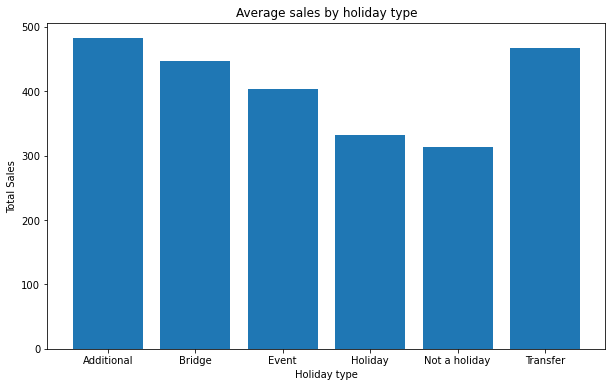

In [16]:
# Let us hypothesize that average sales per day is higher for holidays compared to non holidays


#  Group the data by 'Holiday' and calculate the mean sales for each category
average_sales_per_day = df.groupby('holidays_type')['sales'].mean().reset_index()

# Rename 'Holiday' to 'Category' for clarity
average_sales_per_day = average_sales_per_day.rename(columns={'Holiday': 'Category'})

# Display the result
print(average_sales_per_day)

plt.figure(figsize=(10, 6))
plt.bar(average_sales_per_day['holidays_type'], average_sales_per_day['sales'])

# Customize the plot
plt.title('Average sales by holiday type')
plt.xlabel('Holiday type')
plt.ylabel('Total Sales')

# # Set the x-axis ticks to represent months
# month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# plt.xticks(average_sales_per_day['holidays_type'], month_names)

# Show the plot
plt.show()

On average, bridge and transfer holiday type has more sales compared to holiday and not a holiday

# Sales pattern by year

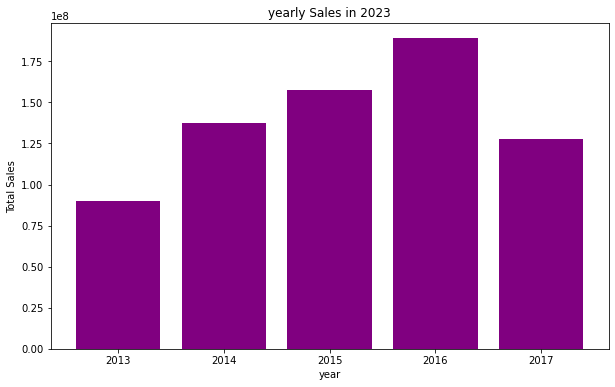

In [17]:
df['date'] = pd.to_datetime(df['date'])
# Extract the month from the date
df['Year'] = df['date'].dt.year

# Group the data by month and sum the sales
monthly_sales = df.groupby('Year')['sales'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Year'], monthly_sales['sales'], color='purple')

# Customize the plot
plt.title('yearly Sales in 2023')
plt.xlabel('year')
plt.ylabel('Total Sales')

# Set the x-axis ticks to represent months
# month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# plt.xticks(monthly_sales['Month'], month_names)

# Show the plot
plt.show()

We can see that the sales during the year 2016 is the highest and during the year 2013 is the lowest. We do no the reason for this pattern. The metadata describes that oil price might effect the sales. Lets examine wether oil price is influencing the sales.

# Relationship between sales and Oil price

In [18]:
df.head()

id       date  store_nbr      family  sales  onpromotion store_city  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0      Quito   
1   1 2013-01-01          1   BABY CARE    0.0            0      Quito   
2   2 2013-01-01          1      BEAUTY    0.0            0      Quito   
3   3 2013-01-01          1   BEVERAGES    0.0            0      Quito   
4   4 2013-01-01          1       BOOKS    0.0            0      Quito   

  store_state store_type  store_cluster  ... holidays_locale  \
0   Pichincha          D             13  ...        National   
1   Pichincha          D             13  ...        National   
2   Pichincha          D             13  ...        National   
3   Pichincha          D             13  ...        National   
4   Pichincha          D             13  ...        National   

  holidays_locale_name holidays_description holidays_transferred oil_price  \
0              Ecuador   Primer dia del ano                False     93.14   
1              Ecuador   Primer dia del ano                False     93.14   
2              Ecuador   Primer dia del ano                False     93.14   
3              Ecuador   Primer dia del ano                False     93.14   
4              Ecuador   Primer dia del ano                False     93.14   

   Month  Month-Year     Promo payday_label  Year  
0      1     2013-01  No Promo       Payday  2013  
1      1     2013-01  No Promo       Payday  2013  
2      1     2013-01  No Promo       Payday  2013  
3      1     2013-01  No Promo       Payday  2013  
4      1     2013-01  No Promo       Payday  2013  

[5 rows x 21 columns]

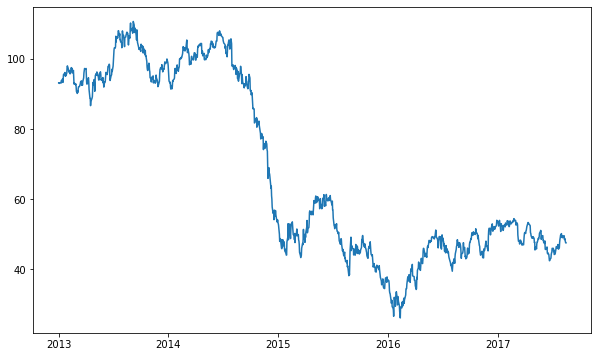

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['oil_price'], label='Oil Price')
plt.show()

We can see that the oil price is lowest during 2016

### Days with maximum sale

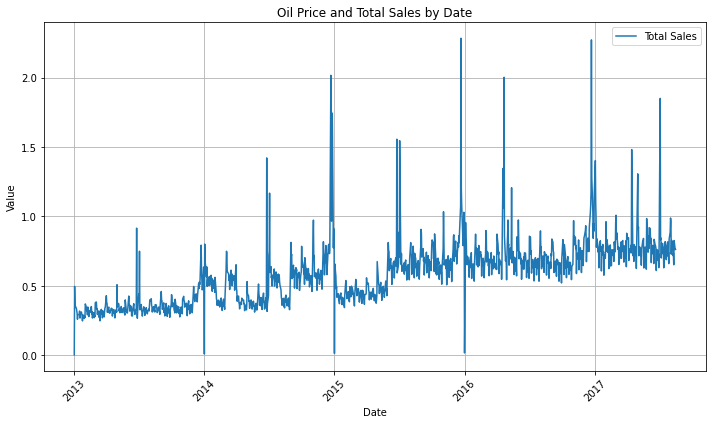

In [20]:
# Group the data by "date" and calculate the total sales for each date
daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales['sales']=daily_sales['sales']/1000000

plt.figure(figsize=(10, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Oil Price and Total Sales by Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see peak sake in early 2016. Now lets dig in the day when the sales is maximum.

In [21]:
# Sort the DataFrame by total sales in descending order and get the top 5 dates
top_5_dates = daily_sales.sort_values(by='sales', ascending=False).head(20)

print("Dates with Maximum Sales")
print(top_5_dates)


Dates with Maximum Sales
           date     sales
773  2015-12-22  2.283724
1034 2016-12-22  2.271699
513  2014-12-22  2.016287
859  2016-04-21  2.002160
1171 2017-07-03  1.850287
516  2014-12-26  1.744197
645  2015-06-25  1.556103
651  2015-07-03  1.545547
1115 2017-04-14  1.481779
385  2014-06-25  1.421370
1041 2017-01-02  1.402306
856  2016-04-18  1.345921
1126 2017-05-01  1.306699
1035 2016-12-23  1.282146
874  2016-05-12  1.206788
774  2015-12-23  1.196146
1033 2016-12-21  1.181307
391  2014-07-03  1.167689
1040 2016-12-30  1.163643
857  2016-04-19  1.152089


We can see that dec 22 has consistently highest sales in year 2014-2016

In [22]:
df.head()

id       date  store_nbr      family  sales  onpromotion store_city  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0      Quito   
1   1 2013-01-01          1   BABY CARE    0.0            0      Quito   
2   2 2013-01-01          1      BEAUTY    0.0            0      Quito   
3   3 2013-01-01          1   BEVERAGES    0.0            0      Quito   
4   4 2013-01-01          1       BOOKS    0.0            0      Quito   

  store_state store_type  store_cluster  ... holidays_locale  \
0   Pichincha          D             13  ...        National   
1   Pichincha          D             13  ...        National   
2   Pichincha          D             13  ...        National   
3   Pichincha          D             13  ...        National   
4   Pichincha          D             13  ...        National   

  holidays_locale_name holidays_description holidays_transferred oil_price  \
0              Ecuador   Primer dia del ano                False     93.14   
1              Ecuador   Primer dia del ano                False     93.14   
2              Ecuador   Primer dia del ano                False     93.14   
3              Ecuador   Primer dia del ano                False     93.14   
4              Ecuador   Primer dia del ano                False     93.14   

   Month  Month-Year     Promo payday_label  Year  
0      1     2013-01  No Promo       Payday  2013  
1      1     2013-01  No Promo       Payday  2013  
2      1     2013-01  No Promo       Payday  2013  
3      1     2013-01  No Promo       Payday  2013  
4      1     2013-01  No Promo       Payday  2013  

[5 rows x 21 columns]

# Sales pattern by day, month, quarter and year

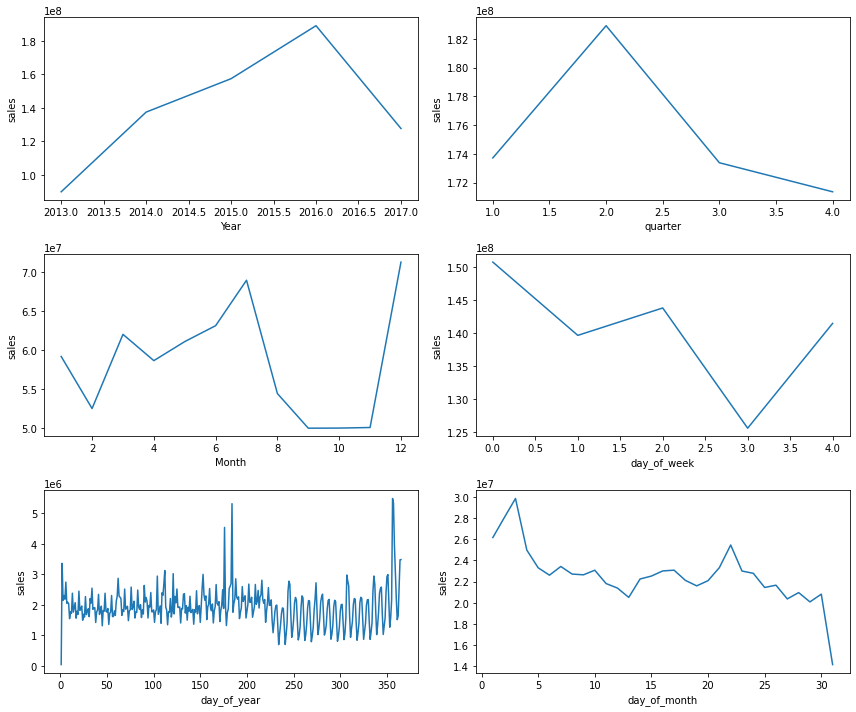

In [23]:
# df['date'] = pd.to_datetime(df["date"])
df['day_of_week'] = df['date'].dt.day_of_week
df['day_of_year'] = df['date'].dt.dayofyear
df['quarter'] = df['date'].dt.quarter
df['day_of_month'] = df['date'].dt.day


grouping_columns = ['Year', 'quarter', 'Month', 'day_of_week', 'day_of_year', 'day_of_month']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = df.groupby(column)['sales'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='sales', ax=axes[ind])

plt.tight_layout()
plt.show()

# Visualizing on promotion

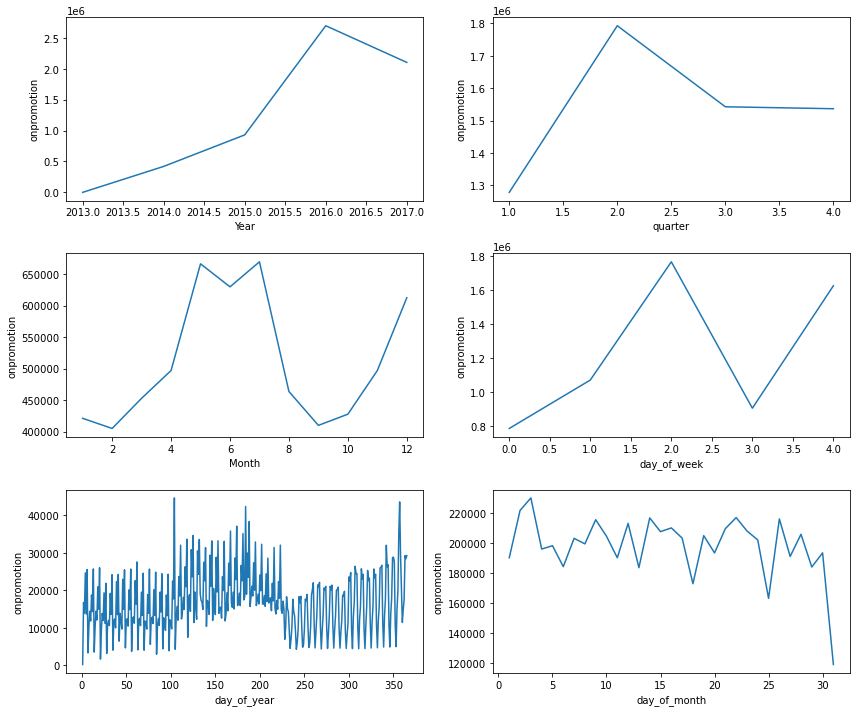

In [24]:
grouping_columns = ['Year', 'quarter', 'Month', 'day_of_week', 'day_of_year', 'day_of_month']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = df.groupby(column)['onpromotion'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='onpromotion', ax=axes[ind])

plt.tight_layout()
plt.show()

## Create New feature month

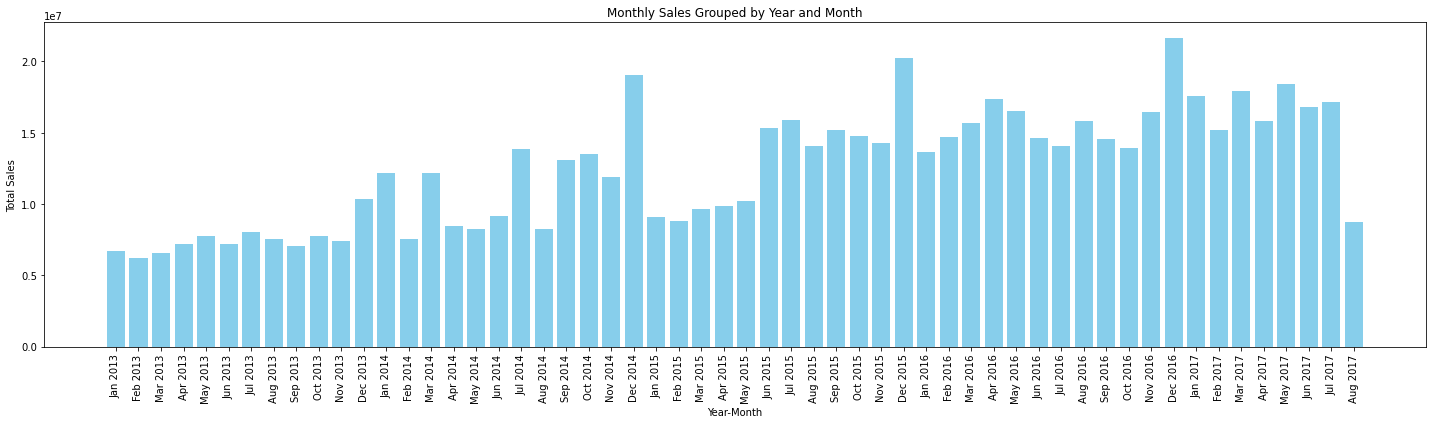

In [34]:
# # lets create a month as new feature and drop column date as we require only the month feature 
# df['Month'] = df['date'].dt.month
# df['Year'] = df['date'].dt.year


# we see that dec have the highest sale among the months and 2016 have highest sales among the year.
# Lets check if monthly sales pattern is similar across all years


monthly_sales = df.groupby(['Year', 'Month'])['sales'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.bar(range(len(monthly_sales)), monthly_sales['sales'], color='skyblue')

# Customize the plot
plt.title('Monthly Sales Grouped by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')

# Set the x-axis ticks and labels based on the 'Year' and 'Month' columns
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
xtick_labels = [f"{month_names[m-1]} {y}" for y, m in zip(monthly_sales['Year'], monthly_sales['Month'])]
plt.xticks(range(len(monthly_sales)), xtick_labels, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


# df.drop(columns=['date'], inplace=True)

# Conclusion

In [35]:
df.head()

id       date  store_nbr      family  sales  onpromotion store_city  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0      Quito   
1   1 2013-01-01          1   BABY CARE    0.0            0      Quito   
2   2 2013-01-01          1      BEAUTY    0.0            0      Quito   
3   3 2013-01-01          1   BEVERAGES    0.0            0      Quito   
4   4 2013-01-01          1       BOOKS    0.0            0      Quito   

  store_state store_type  store_cluster  ... oil_price Month Month-Year  \
0   Pichincha          D             13  ...     93.14     1    2013-01   
1   Pichincha          D             13  ...     93.14     1    2013-01   
2   Pichincha          D             13  ...     93.14     1    2013-01   
3   Pichincha          D             13  ...     93.14     1    2013-01   
4   Pichincha          D             13  ...     93.14     1    2013-01   

      Promo payday_label  Year  day_of_week day_of_year quarter day_of_month  
0  No Promo       Payday  2013            1           1       1            1  
1  No Promo       Payday  2013            1           1       1            1  
2  No Promo       Payday  2013            1           1       1            1  
3  No Promo       Payday  2013            1           1       1            1  
4  No Promo       Payday  2013            1           1       1            1  

[5 rows x 25 columns]

In [36]:
# saving the merged data into csv file
df.to_csv('data/eda_data.csv', index=False)

# Data preprocessing

## categorical column encoding

Now, lets see the number of unique values in categorical variable. It is important because, if categorical column have large number of unique values then we cannot use one-hot encoding in that variable 

In [21]:
def count_unique_values(df):
    unique_counts = {}
    
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            num_unique = len(unique_values)
            unique_counts[column] = num_unique
            
    return unique_counts

unique_counts = count_unique_values(df)
print(unique_counts)

{'family': 33, 'store_city': 22, 'store_state': 16, 'store_type': 5, 'holidays_type': 6, 'holidays_locale': 4, 'holidays_locale_name': 25, 'holidays_description': 81, 'holidays_transferred': 3, 'Promo': 2, 'payday_label': 2}


we can see that holiday description has maximum uqniue values. The model will essentially learn the description and importance of each feature during the training. Therefore, we drop the holidays_description column. Also the date is not that important, lets drop the date and id column as well

In [22]:
df.drop(columns=['holidays_description','id'], inplace=True)

In [23]:
df.head()

date  store_nbr      family  sales  onpromotion store_city  \
0 2013-01-01          1  AUTOMOTIVE    0.0            0      Quito   
1 2013-01-01          1   BABY CARE    0.0            0      Quito   
2 2013-01-01          1      BEAUTY    0.0            0      Quito   
3 2013-01-01          1   BEVERAGES    0.0            0      Quito   
4 2013-01-01          1       BOOKS    0.0            0      Quito   

  store_state store_type  store_cluster holidays_type holidays_locale  \
0   Pichincha          D             13       Holiday        National   
1   Pichincha          D             13       Holiday        National   
2   Pichincha          D             13       Holiday        National   
3   Pichincha          D             13       Holiday        National   
4   Pichincha          D             13       Holiday        National   

  holidays_locale_name holidays_transferred  oil_price  Month Month-Year  \
0              Ecuador                False      93.14      1    2013-01   
1              Ecuador                False      93.14      1    2013-01   
2              Ecuador                False      93.14      1    2013-01   
3              Ecuador                False      93.14      1    2013-01   
4              Ecuador                False      93.14      1    2013-01   

      Promo payday_label  Year  
0  No Promo       Payday  2013  
1  No Promo       Payday  2013  
2  No Promo       Payday  2013  
3  No Promo       Payday  2013  
4  No Promo       Payday  2013